# Exploratory Data Analysis on Crop Production in India

I will be analyzing the Agriculture Crop Production dataset and try to answer some interesting questions. I have downloaded the dataset from Kaggle datasets.The libraries for data analysis and visualization that I have used in this project are Numpy, Pandas, Matplotlib and Seaborn.


## Data Preparation and Cleaning

- Load the file using Pandas
- Look at some information about the data
- Fix any missing values

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/Ritveek Mahajan/Desktop/EDA/crop_production.csv')

In [3]:
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [5]:
df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


##### Checking for Missing Data

In [6]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [7]:
3730/246091

0.015156994770227274

In [8]:
#Dropping the samples having missing data
df.dropna(subset=["Production"],axis=0,inplace=True)

In [9]:
df.describe()

,Crop_Year,Area,Production
count,242361.000000,2.423610e+05,2.423610e+05
mean,2005.625773,1.216741e+04,5.825034e+05
std,4.958285,5.085744e+04,1.706581e+07
min,1997.000000,1.000000e-01,0.000000e+00
25%,2002.000000,8.700000e+01,8.800000e+01
50%,2006.000000,6.030000e+02,7.290000e+02
75%,2010.000000,4.545000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [10]:
df.shape

(242361, 7)

## Exploratory Analysis and Visualization

#### Univarate Analysis

In [11]:
states = df.State_Name.unique()
print(states)

['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir '
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana ' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']


In [12]:
len(states)

33

In [13]:
df.State_Name.value_counts()

Uttar Pradesh                  33189
Madhya Pradesh                 22604
Karnataka                      21079
Bihar                          18874
Assam                          14622
Odisha                         13524
Tamil Nadu                     13266
Maharashtra                    12496
Rajasthan                      12066
Chhattisgarh                   10368
West Bengal                     9597
Andhra Pradesh                  9561
Gujarat                         8365
Telangana                       5591
Uttarakhand                     4825
Haryana                         4540
Kerala                          4003
Nagaland                        3904
Punjab                          3143
Meghalaya                       2867
Arunachal Pradesh               2545
Himachal Pradesh                2456
Jammu and Kashmir               1632
Tripura                         1412
Jharkhand                       1266
Manipur                         1266
Mizoram                          954
P


- We have data from 33 states (including union territories). 
- We have more data from top agriculture rich states like Uttar Pradesh, Madhya Pradesh and Karnataka than other states.

In [14]:
print(df.Crop_Year.nunique())
print(df.Crop_Year.min())
print(df.Crop_Year.max())

19
1997
2015


In [15]:
print(df.Crop_Year.value_counts())

2003    17139
2002    16536
2007    14269
2008    14230
2006    13976
2004    13858
2010    13793
2011    13791
2009    13767
2000    13553
2005    13519
2013    13475
2001    13293
2012    13184
1999    12441
1998    11262
2014    10815
1997     8899
2015      561
Name: Crop_Year, dtype: int64


- We have data of 19 years from 1997 to 2015.
- The years having more data are - 2003, 2002, 2007, 2008 and 2006

In [16]:
print(df.Season.nunique())

6


In [17]:
seasons = df.Season.unique()
print(seasons)

['Kharif     ' 'Whole Year ' 'Autumn     ' 'Rabi       ' 'Summer     '
 'Winter     ']


In [18]:
print(df.Season.max())

Winter     


In [19]:
print(df.Season.value_counts())

Kharif         94283
Rabi           66160
Whole Year     56127
Summer         14811
Winter          6050
Autumn          4930
Name: Season, dtype: int64


- Dataset talks of six different seasons - Kharif, Annual, Autumn, Rabi, Summer and Winter. 
- More crops yielding in Winter. 
- Frequency wise, we have more data points from Kharif, Rabi and Annual crop types.

In [20]:
print(df.Crop.nunique())

124


In [21]:
crops = df.Crop.unique()
print(crops)

['Arecanut' 'Other Kharif pulses' 'Rice' 'Banana' 'Cashewnut' 'Coconut '
 'Dry ginger' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Black pepper'
 'Dry chillies' 'other oilseeds' 'Turmeric' 'Maize' 'Moong(Green Gram)'
 'Urad' 'Arhar/Tur' 'Groundnut' 'Sunflower' 'Bajra' 'Castor seed'
 'Cotton(lint)' 'Horse-gram' 'Jowar' 'Korra' 'Ragi' 'Tobacco' 'Gram'
 'Wheat' 'Masoor' 'Sesamum' 'Linseed' 'Safflower' 'Onion'
 'other misc. pulses' 'Samai' 'Small millets' 'Coriander' 'Potato'
 'Other  Rabi pulses' 'Soyabean' 'Beans & Mutter(Vegetable)' 'Bhindi'
 'Brinjal' 'Citrus Fruit' 'Cucumber' 'Grapes' 'Mango' 'Orange'
 'other fibres' 'Other Fresh Fruits' 'Other Vegetables' 'Papaya'
 'Pome Fruit' 'Tomato' 'Mesta' 'Cowpea(Lobia)' 'Lemon' 'Pome Granet'
 'Sapota' 'Cabbage' 'Rapeseed &Mustard' 'Peas  (vegetable)' 'Niger seed'
 'Bottle Gourd' 'Varagu' 'Garlic' 'Ginger' 'Oilseeds total' 'Pulses total'
 'Jute' 'Peas & beans (Pulses)' 'Blackgram' 'Paddy' 'Pineapple' 'Barley'
 'Sannhamp' 'Khesari' 'Guar seed' 'Moth' 

In [22]:
print(df.Crop.value_counts().head(25))

Rice                     15082
Maize                    13787
Moong(Green Gram)        10106
Urad                      9710
Sesamum                   8821
Groundnut                 8770
Wheat                     7878
Sugarcane                 7827
Rapeseed &Mustard         7533
Arhar/Tur                 7476
Gram                      7227
Jowar                     6990
Onion                     6984
Potato                    6914
Dry chillies              6421
Sunflower                 5483
Bajra                     5379
Small millets             4593
Peas & beans (Pulses)     4447
Cotton(lint)              4382
Linseed                   4351
Turmeric                  4168
Masoor                    4152
Sweet potato              4122
Ragi                      4116
Name: Crop, dtype: int64


In [23]:
print(df.Area.max())
print(df.Area.min())

8580100.0
0.1


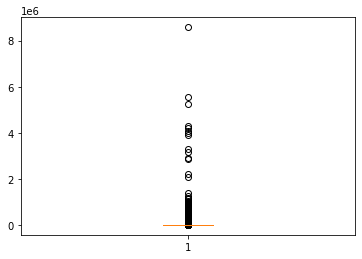

In [24]:
plt.boxplot(df.Area);

In [25]:
df.Production.describe()

count    2.423610e+05
mean     5.825034e+05
std      1.706581e+07
min      0.000000e+00
25%      8.800000e+01
50%      7.290000e+02
75%      7.023000e+03
max      1.250800e+09
Name: Production, dtype: float64

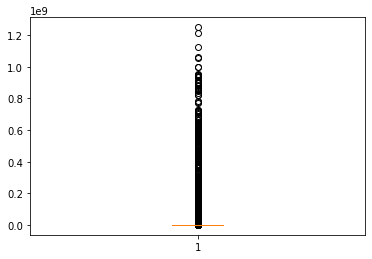

In [26]:
plt.boxplot(df.Production);

### New Variables

In [27]:
crop = df['Crop']

In [28]:
def crop_category(crop):
    for i in ['Rice','Maize','Wheat','Barley','Varagu','Other Cereals & Millets','Ragi','Small millets','Bajra','Jowar', 'Paddy','Total foodgrain','Jobster']:
        if crop==i:
            return 'Cereal'
    for i in ['Moong','Urad','Arhar/Tur','Peas & beans','Masoor',
              'Other Kharif pulses','other misc. pulses','Ricebean (nagadal)',
              'Rajmash Kholar','Lentil','Samai','Blackgram','Korra','Cowpea(Lobia)',
              'Other  Rabi pulses','Other Kharif pulses','Peas & beans (Pulses)','Pulses total','Gram']:
        if crop==i:
            return 'Pulses'
    for i in ['Peach','Apple','Litchi','Pear','Plums','Ber','Sapota','Lemon','Pome Granet',
               'Other Citrus Fruit','Water Melon','Jack Fruit','Grapes','Pineapple','Orange',
               'Pome Fruit','Citrus Fruit','Other Fresh Fruits','Mango','Papaya','Coconut','Banana']:
        if crop==i:
            return 'Fruits'
    for i in ['Bean','Lab-Lab','Moth','Guar seed','Soyabean','Horse-gram']:
        if crop==i:
            return 'Beans'
    for i in ['Turnip','Peas','Beet Root','Carrot','Yam','Ribed Guard','Ash Gourd ','Pump Kin','Redish','Snak Guard','Bottle Gourd',
              'Bitter Gourd','Cucumber','Drum Stick','Cauliflower','Beans & Mutter(Vegetable)','Cabbage',
              'Bhindi','Tomato','Brinjal','Khesari','Sweet potato','Potato','Onion','Tapioca','Colocosia']:
              if crop==i:
                return 'Vegetables'
    for i in ['Perilla','Ginger','Cardamom','Black pepper','Dry ginger','Garlic','Coriander','Turmeric','Dry chillies','Cond-spcs other']:
        if crop==i:
            return 'spices'
    for i in ['other fibres','Kapas','Jute & mesta','Jute','Mesta','Cotton(lint)','Sannhamp']:
        if crop==i:
            return 'fibres'
    for i in ['Arcanut (Processed)','Atcanut (Raw)','Cashewnut Processed','Cashewnut Raw','Cashewnut','Arecanut','Groundnut']:
        if crop==i:
            return 'Nuts'
    for i in ['other oilseeds','Safflower','Niger seed','Castor seed','Linseed','Sunflower','Rapeseed &Mustard','Sesamum','Oilseeds total']:
        if crop==i:
            return 'Oilseeds'
    for i in ['Tobacco','Coffee','Tea','Sugarcane','Rubber']:
        if crop==i:
            return 'Commercial'

df['crop_category']=df['Crop'].apply(crop_category)

In [29]:
df["crop_category"].value_counts()

Cereal        63283
Pulses        40898
Oilseeds      33801
Vegetables    23154
spices        21638
Nuts          11472
Commercial    10561
fibres         9785
Beans          9115
Fruits         6153
Name: crop_category, dtype: int64

- A new variable 'crop_category' is created.
- Cereals, Pulses and Oilseeds are top producing categories.

In [30]:
# NEW VARIABLE - PRODUCTION PER UNIT AREA
df['prod_per_unit_area'] = df['Production'] / df['Area']

In [31]:
df["prod_per_unit_area"]

0          1.594896
1          0.500000
2          3.147059
3          3.642045
4          0.229167
            ...    
246086     2.617647
246087     0.738437
246088    50.154321
246089     2.141848
246090     0.502857
Name: prod_per_unit_area, Length: 242361, dtype: float64

- A new new variable 'prod_per_unit_area' for Production per unit area is created.

## Visualising Data

### 1. State wise production

In [32]:
prod = df.groupby(by = df.State_Name)['Production','State_Name'].sum().reset_index().sort_values(by = 'Production', ascending = False)
prod

<ipython-input-32-ad07679949b9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  prod = df.groupby(by = df.State_Name)['Production','State_Name'].sum().reset_index().sort_values(by = 'Production', ascending = False)


,State_Name,Production
15,Kerala,9.788005e+10
1,Andhra Pradesh,1.732459e+10
27,Tamil Nadu,1.207644e+10
30,Uttar Pradesh,3.234493e+09
3,Assam,2.111752e+09
32,West Bengal,1.397904e+09
17,Maharashtra,1.263641e+09
14,Karnataka,8.634298e+08
0,Andaman and Nicobar Islands,7.182232e+08
24,Punjab,5.863850e+08


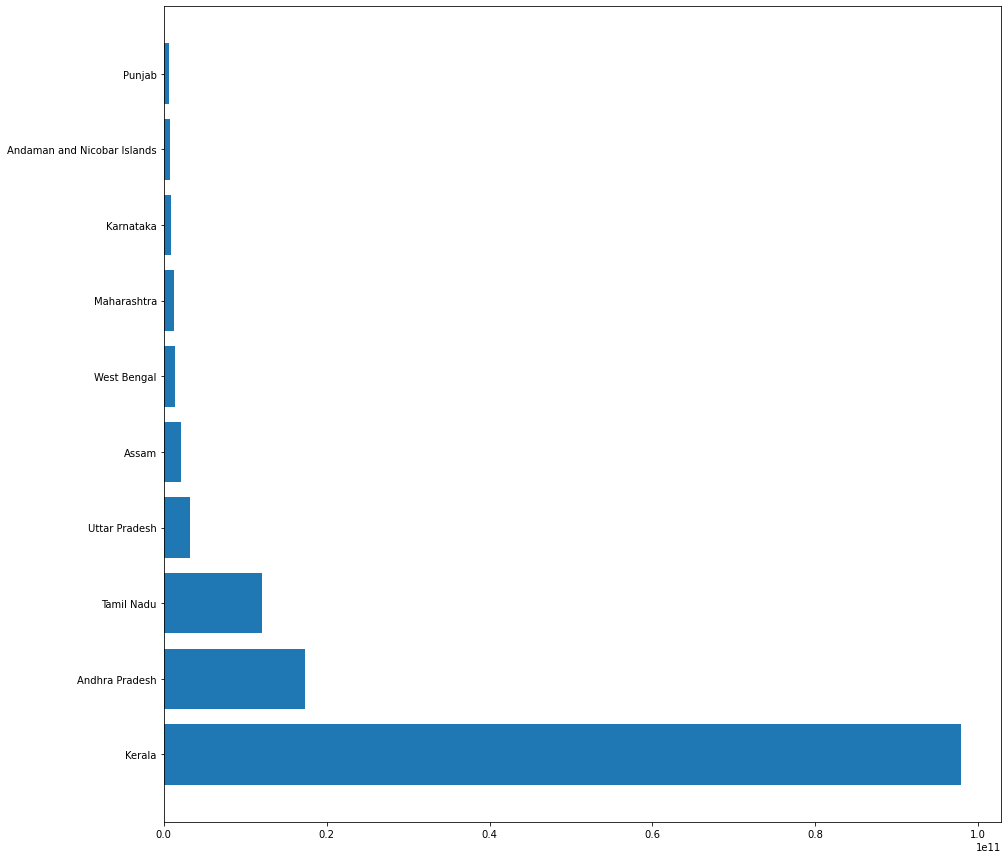

In [33]:
plt.figure(figsize= (15,15))
x=prod['Production'].head(10)
y= prod["State_Name"].head(10)
plt.barh(y,x);

In [34]:
df.Production.describe()

count    2.423610e+05
mean     5.825034e+05
std      1.706581e+07
min      0.000000e+00
25%      8.800000e+01
50%      7.290000e+02
75%      7.023000e+03
max      1.250800e+09
Name: Production, dtype: float64

### 2. Crop wise production

In [35]:
#Top 10 crops by production
crop1 = df.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by='Production', ascending=False).head(10)
crop1 

,Crop,Production
28,Coconut,1.299816e+11
106,Sugarcane,5.535682e+09
95,Rice,1.605470e+09
119,Wheat,1.332826e+09
87,Potato,4.248263e+08
33,Cotton(lint),2.970000e+08
59,Maize,2.733418e+08
49,Jute,1.815582e+08
7,Banana,1.461327e+08
105,Soyabean,1.418372e+08


Text(0.5, 1.0, 'Overall Crops vs Production')

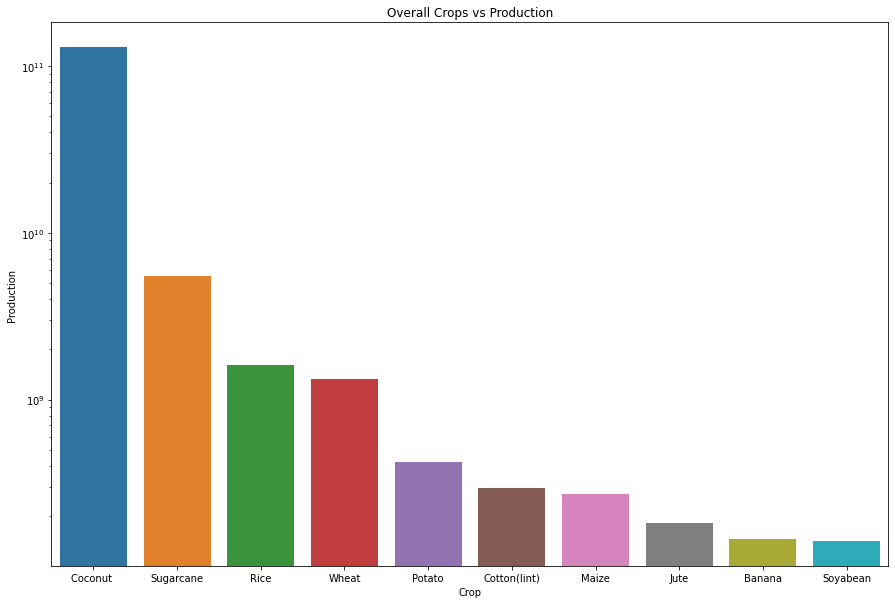

In [36]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(crop1.Crop, crop1.Production)
plt.yscale('log')
plt.title('Overall Crops vs Production')

- The crops with maximum production are: Coconut, Sugarcane, Rice

### 3. Year wise production

In [37]:
year_wise_prod = df.groupby(by='Crop_Year')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)
year_wise_prod

,Crop_Year,Production
14,2011,1.430890e+10
16,2013,1.290359e+10
9,2006,8.681913e+09
17,2014,8.664541e+09
7,2004,8.189462e+09
15,2012,8.171055e+09
8,2005,8.043757e+09
6,2003,7.917974e+09
11,2008,7.717018e+09
5,2002,7.696955e+09


Text(0.5, 1.0, 'Crops Year vs Production')

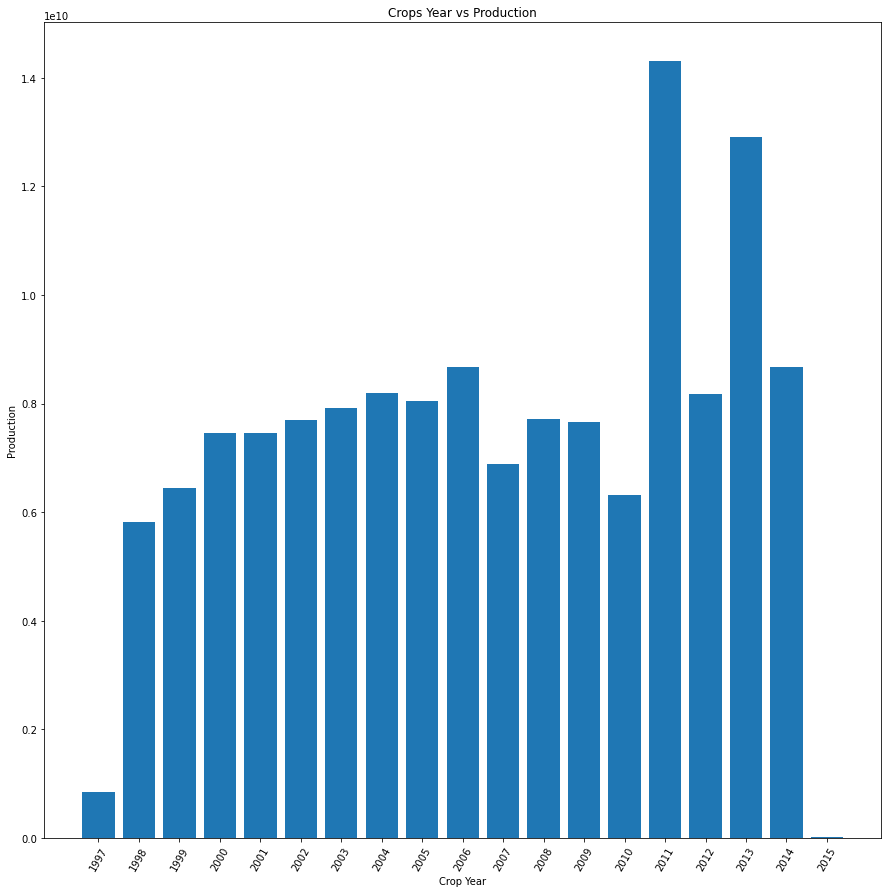

In [38]:
plt.figure(figsize=(15,15))
plt.bar(year_wise_prod.Crop_Year, year_wise_prod.Production, width=0.8)

plt.xticks(year_wise_prod.Crop_Year, rotation = '60')
plt.xlabel("Crop Year")
plt.ylabel("Production")
plt.title('Crops Year vs Production')

- The production was maximum in years - 2011 and 2013

### 4. Season wise Production

In [39]:
season_wise_prod = df.groupby(by='Season')['Production'].sum().reset_index().sort_values(by='Production', ascending=False).head(10)
season_wise_prod

,Season,Production
4,Whole Year,1.344248e+11
1,Kharif,4.029970e+09
2,Rabi,2.051688e+09
5,Winter,4.345498e+08
3,Summer,1.706579e+08
0,Autumn,6.441377e+07


Text(0.5, 1.0, 'Season vs Production')

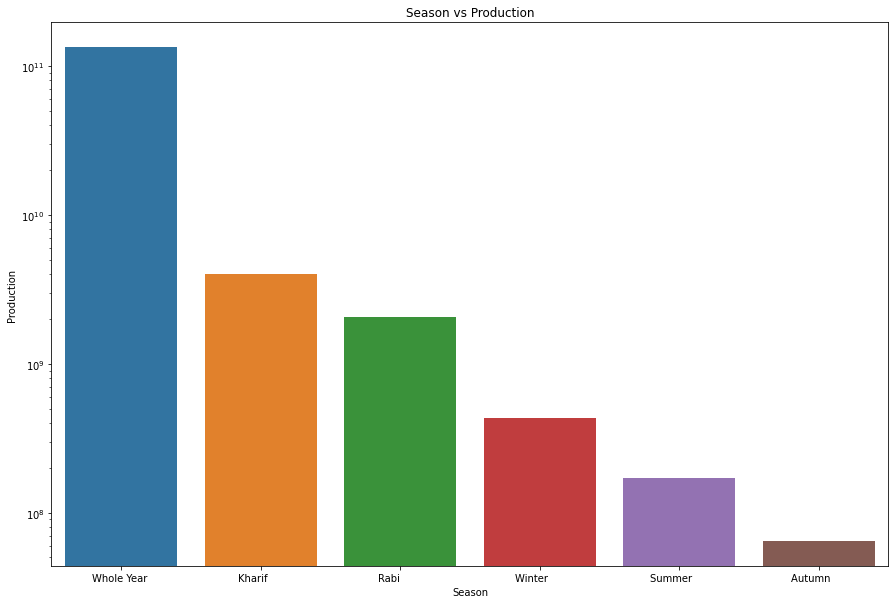

In [40]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(season_wise_prod.Season, season_wise_prod.Production)
plt.yscale('log')
plt.title('Season vs Production')

- Top crop categories which shows high production values are Whole Year(Annual growing plants), Kharif and Rabi crops.
- These crop are generally dependent on monsoons.

### 5. Category wise production

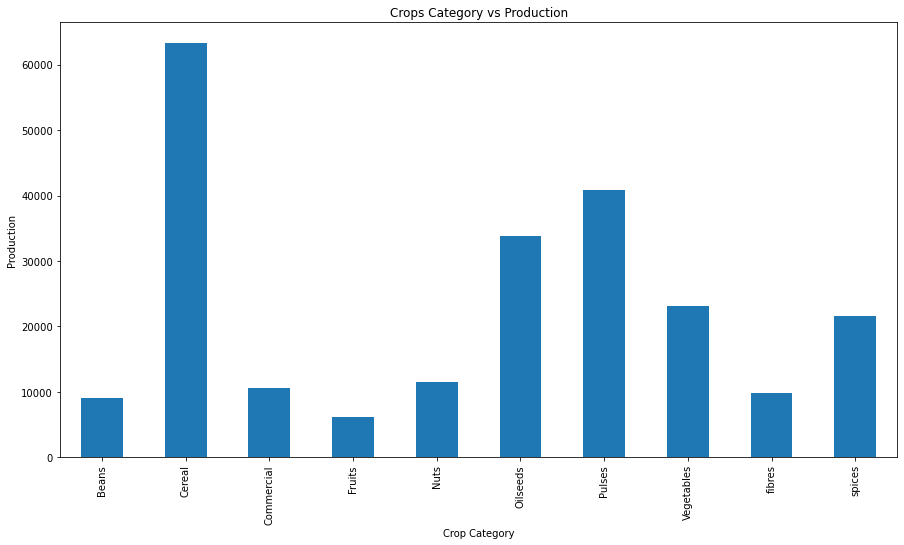

In [41]:
plt.figure(figsize=(15,8))
plt.tick_params(labelsize=10)
df.groupby("crop_category")["Production"].agg("count").plot.bar()
plt.xlabel("Crop Category")
plt.ylabel("Production")
plt.title('Crops Category vs Production')
plt.show()

### 6. Different proportion of Crop Categories for India

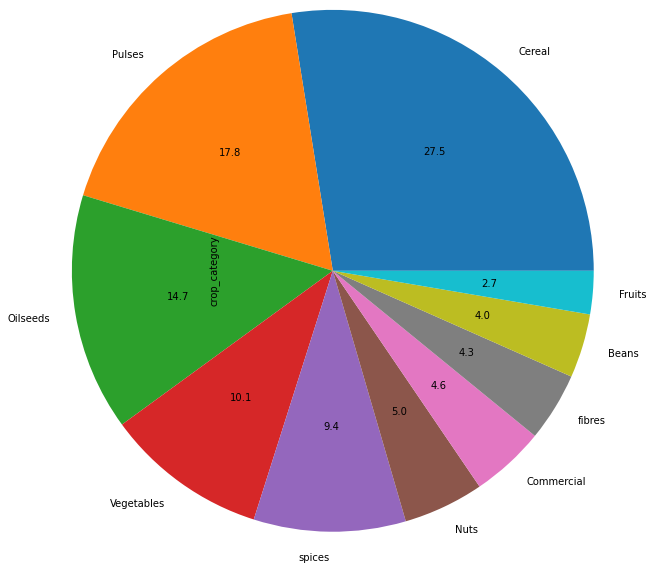

In [42]:
df1=df["crop_category"].value_counts()
df1.plot(radius=3,kind="pie",autopct="%1.1f",pctdistance=0.6)
plt.tick_params(labelsize=10)

Top producing crop categories are 
- Cereals - 27.5%
- Pulses - 17.8%
- Oilseeds - 14.7%

### State wise crop production with different categories of crops

In [43]:
state_wise = pd.crosstab(df['State_Name'], df['crop_category'])
state_wise

crop_category,Beans,Cereal,Commercial,Fruits,Nuts,Oilseeds,Pulses,Vegetables,fibres,spices
State_Name,,,,,,,,,,
Andaman and Nicobar Islands,0,20,15,16,37,11,9,20,0,52
Andhra Pradesh,386,2264,474,502,674,1101,1336,1046,333,802
Arunachal Pradesh,26,1021,168,0,26,343,67,257,0,637
Assam,0,2952,854,920,400,2097,2234,1781,1284,1338
Bihar,280,6108,756,226,130,2504,3731,1775,924,1396
Chandigarh,0,39,0,0,0,7,14,26,0,0
Chhattisgarh,646,1805,316,264,261,1496,2087,1143,535,1288
Dadra and Nagar Haveli,0,116,12,9,9,30,64,0,13,1
Goa,0,62,22,16,47,0,32,0,0,12


## Questions and Answers

### 1. Which Crop is seen in high frequency and when and where is it grown in India?

In [44]:
df["Crop"].value_counts().head(10)

Rice                 15082
Maize                13787
Moong(Green Gram)    10106
Urad                  9710
Sesamum               8821
Groundnut             8770
Wheat                 7878
Sugarcane             7827
Rapeseed &Mustard     7533
Arhar/Tur             7476
Name: Crop, dtype: int64

In [45]:
rice_df = df[df["Crop"]=="Rice"]
rice_df.head(10)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,crop_category,prod_per_unit_area
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00,Cereal,3.147059
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.00,300.00,Cereal,3.614458
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.20,510.84,Cereal,2.700000
27,Andaman and Nicobar Islands,NICOBARS,2003,Kharif,Rice,52.00,90.17,Cereal,1.734038
36,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,Rice,52.94,72.57,Cereal,1.370797
45,Andaman and Nicobar Islands,NICOBARS,2005,Kharif,Rice,2.09,12.06,Cereal,5.770335
64,Andaman and Nicobar Islands,NICOBARS,2010,Autumn,Rice,3.50,10.00,Cereal,2.857143
81,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2000,Kharif,Rice,10779.00,31863.00,Cereal,2.956026
92,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2001,Kharif,Rice,9718.00,27033.00,Cereal,2.781745
98,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2006,Kharif,Rice,6854.30,18995.62,Cereal,2.771344


Text(0.5, 1.0, 'Season vs Rice Production')

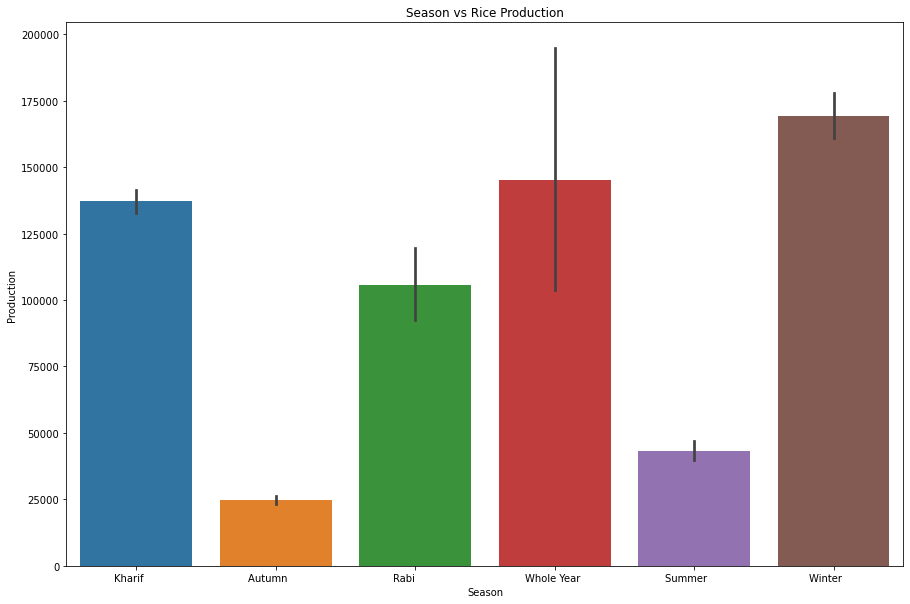

In [46]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot("Season","Production",data=rice_df);
plt.title('Season vs Rice Production')

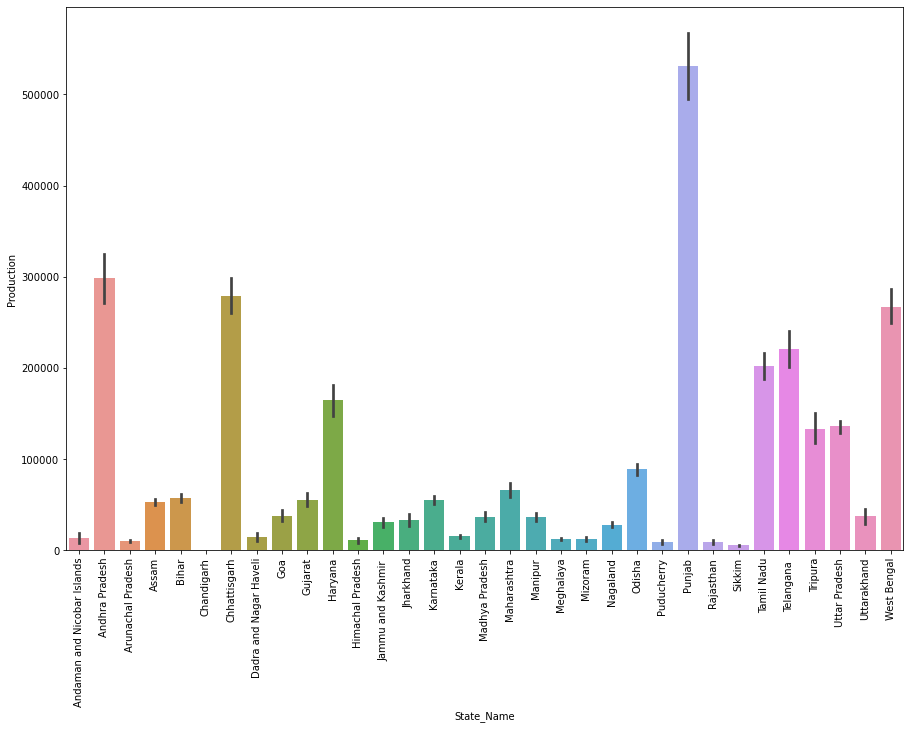

In [47]:
plt.figure(figsize=(15,10))
sns.barplot("State_Name","Production",data=rice_df)
plt.xticks(rotation=90)
plt.show()

In [48]:
rice_prod_dis = rice_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(by='Production',ascending=False)
sum_rice = rice_prod_dis["Production"].sum()
rice_prod_dis["Percent_of_Production"] = rice_prod_dis["Production"].map(lambda x:(x/sum_rice)*100)
rice_prod_dis.head(10)

,District_Name,Production,Percent_of_Production
58,BARDHAMAN,34239976.0,2.132707
374,MEDINIPUR WEST,29192719.0,1.818328
612,WEST GODAVARI,27845309.0,1.734402
169,EAST GODAVARI,24690929.0,1.537925
494,SANGRUR,24448000.0,1.522794
325,KRISHNA,20280606.0,1.263219
90,BIRBHUM,19753571.0,1.230391
347,LUDHIANA,18950000.0,1.180339
386,MURSHIDABAD,18403217.0,1.146282
214,GUNTUR,18245831.0,1.136479


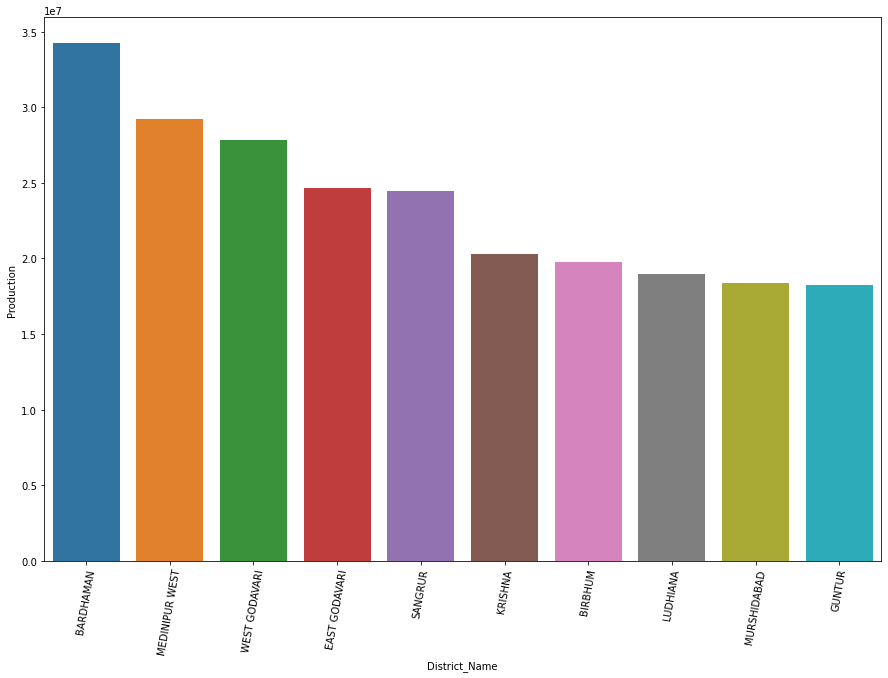

In [49]:
plt.figure(figsize=(15,10))
sns.barplot("District_Name","Production",data=rice_prod_dis.head(10))
plt.xticks(rotation=80)
plt.show()

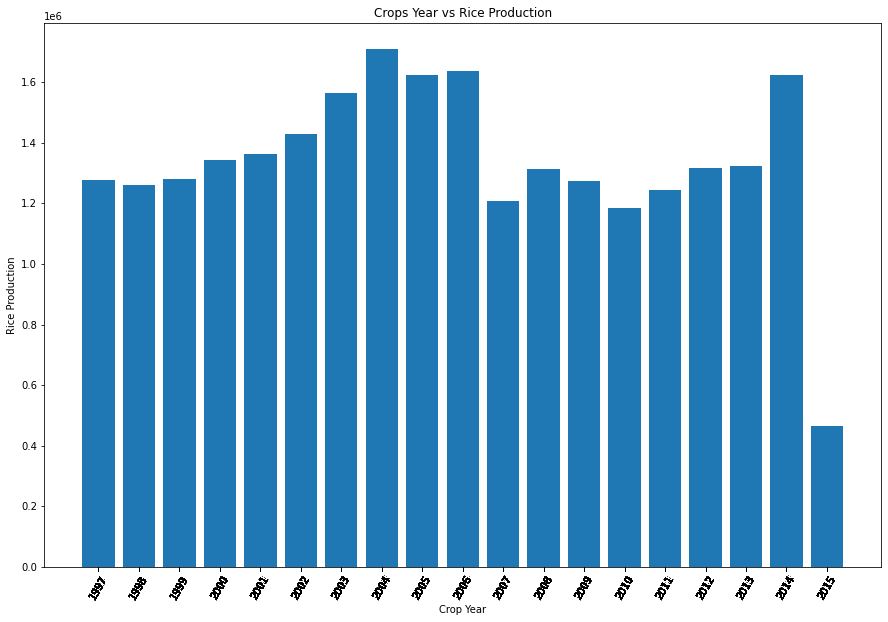

In [50]:
plt.figure(figsize= (15,10))
x= rice_df['Crop_Year']
y= rice_df["Production"]
plt.xticks(rice_df['Crop_Year'], rotation = '60')
plt.xlabel("Crop Year")
plt.ylabel("Rice Production")
plt.title('Crops Year vs Rice Production')
plt.bar(x,y);

###### Answers
- Rice is seen to have more frequency.
- Rice is grown majorly in Winter.
- State wise Punjab dominates in rice production
- District wise its BARDHAMAN(2.13%), MEDINIPUR WEST(1.8%) and WEST GODAVARI(1.73%) which contributes to total rice production.
- Year wise 2004 is the year when production reached the peak production.

### 2. Which states ranks high in area wise crop production in India? Substantiate with facts and Figures.

In [51]:
df_area = df.groupby('State_Name')['Area'].sum().reset_index().sort_values(by='Area', ascending=False)
df_area.head(10)

,State_Name,Area
30,Uttar Pradesh,4.336223e+08
16,Madhya Pradesh,3.297913e+08
17,Maharashtra,3.221860e+08
25,Rajasthan,2.687882e+08
32,West Bengal,2.154030e+08
14,Karnataka,2.029086e+08
9,Gujarat,1.549261e+08
1,Andhra Pradesh,1.315073e+08
4,Bihar,1.282695e+08
24,Punjab,1.267152e+08


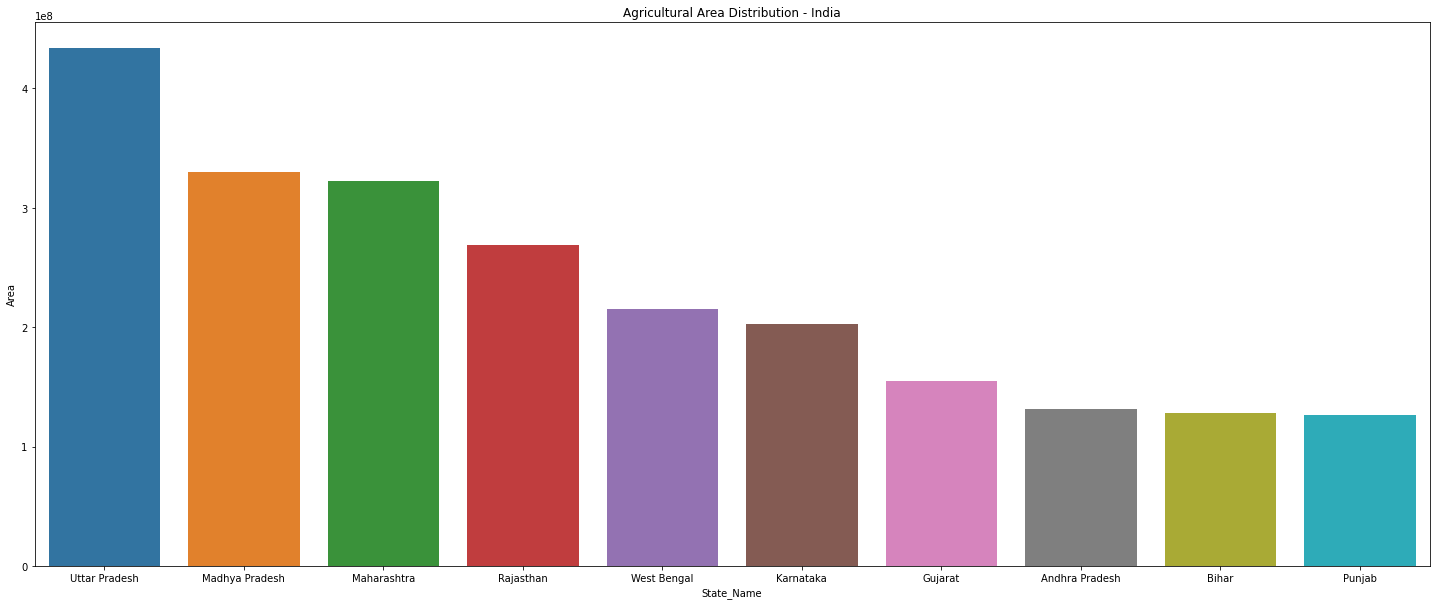

In [52]:
fig, ax = plt.subplots(figsize=(25,10))
sns.barplot(df_area.State_Name.head(10), df_area.Area.head(10), errwidth=0)
plt.title('Agricultural Area Distribution - India');

- Top cultivating states based on the Cultivation area are: Uttar Pradesh, Madhya Pradesh and Maharashtra.

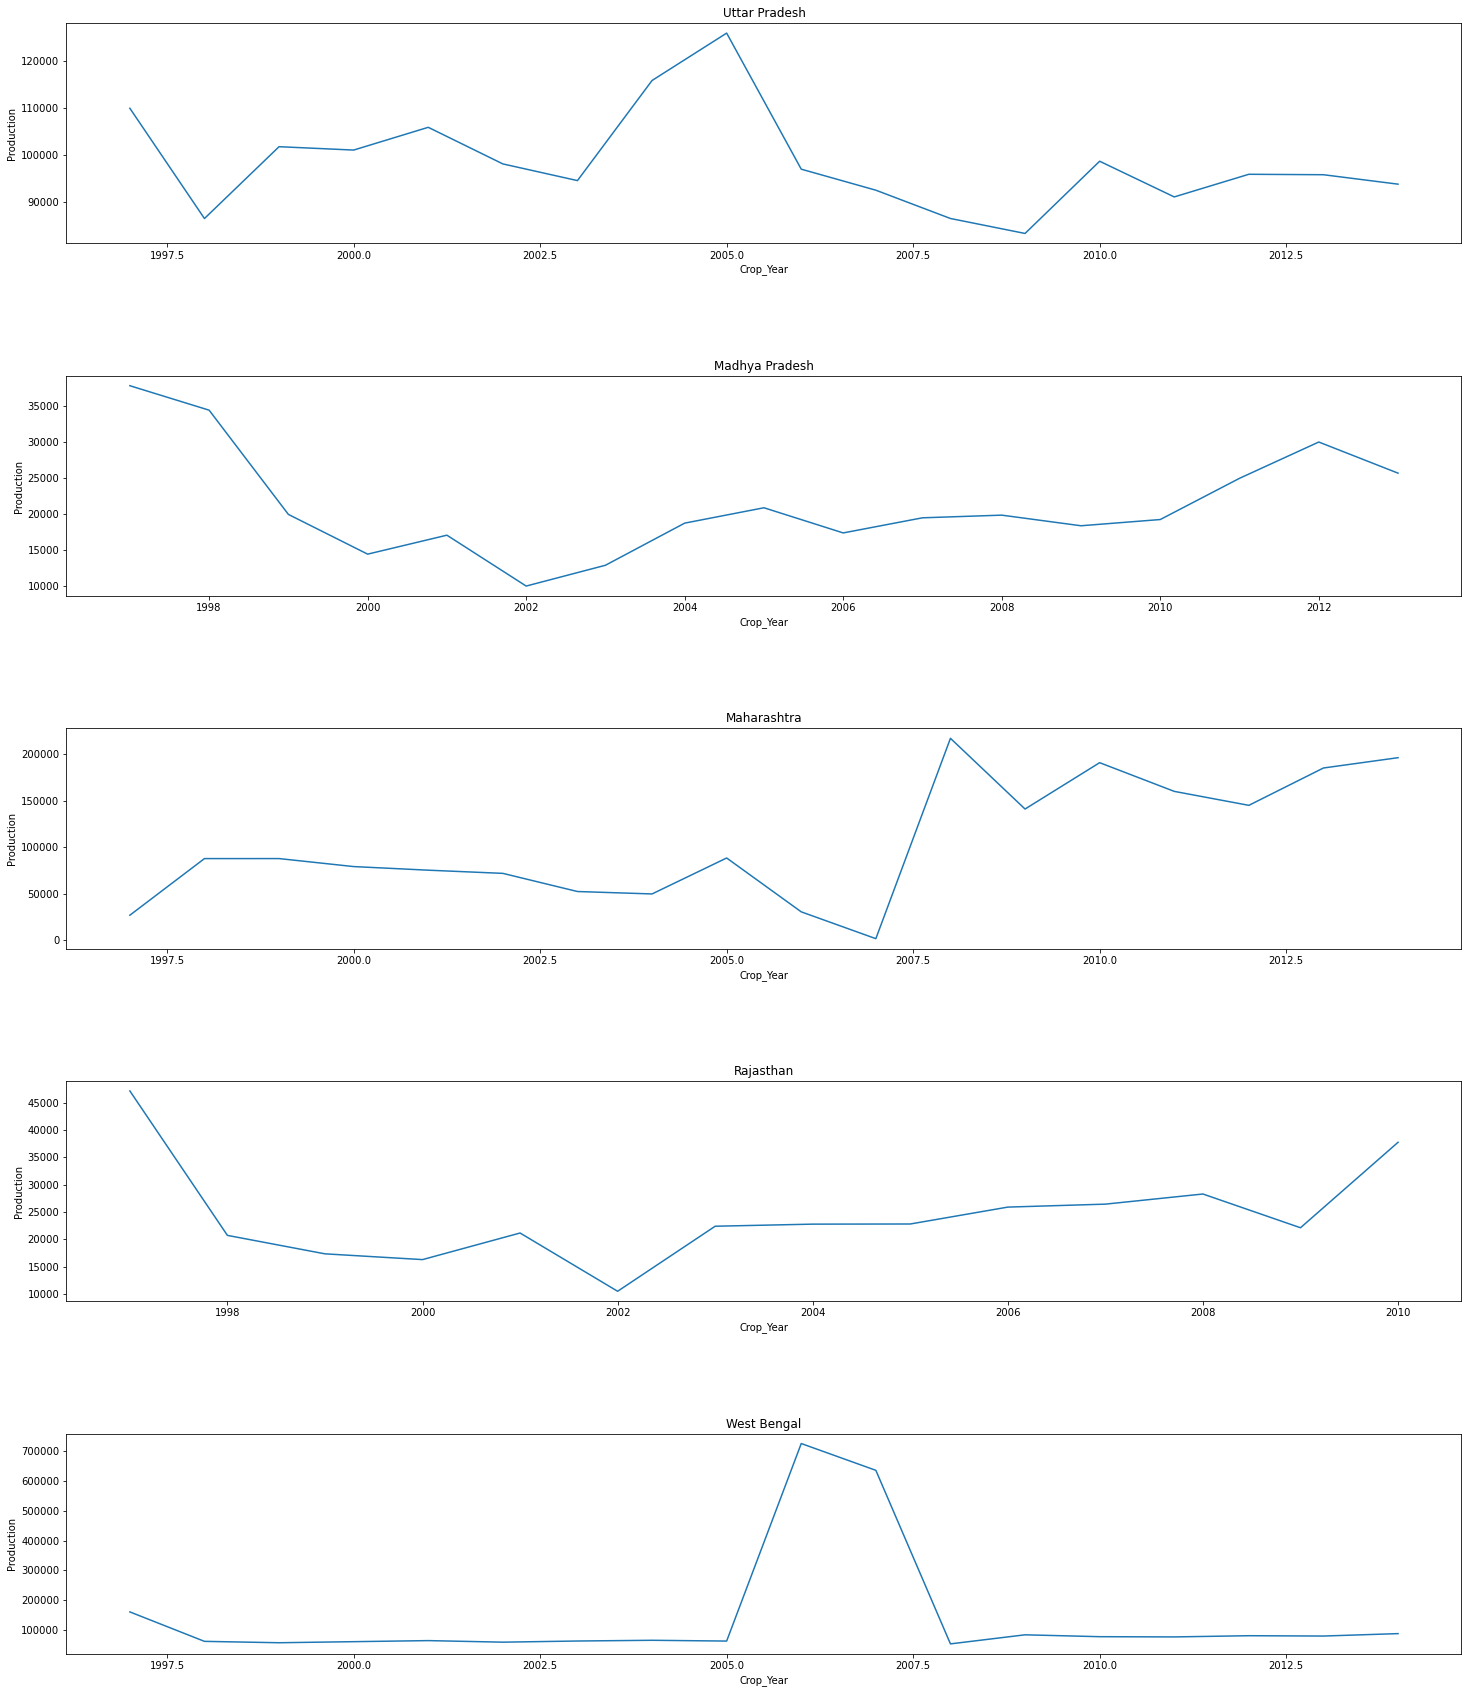

In [53]:
df_area_5 = df_area.head(5)

fig, ax = plt.subplots(figsize=(25,30), sharey='col')
count = 1

for state in df_area_5.State_Name.unique():
    plt.subplot(len(df_area_5.State_Name.unique()),1,count)
    sns.lineplot(df[df.State_Name==state]['Crop_Year'],df[df.State_Name==state]['Production'], ci=None)
    plt.subplots_adjust(hspace=0.6)
    plt.title(state)
    count+=1;

- Uttar Pradesh - High Production was seen in 2005 and after that it’s been reducing gradually.
- Madhya Pradesh - 1998 showed a high production and then there was gradual reduction but it picked up and 2012 also showed a peak in Production.
- Maharashtra - Production went down drastically in 2006 and again the levels went up and hit a high peak after 2007.
- Rajasthan - Production hit a all time low in the year 2002 and then picked up by 2010.
- West Bengal - Production hit a peak around 2006 but it has hit a low after 2007 and never recovered back.

### 3. Find the most efficient state (in terms of most production per unit area). Also find the most efficient state for some of the crop categories.

In [54]:
efficiency = df.groupby('State_Name')['prod_per_unit_area'].mean().reset_index().sort_values(by='prod_per_unit_area', ascending=False)
efficiency.head(10)

,State_Name,prod_per_unit_area
23,Puducherry,763.596415
15,Kerala,381.272231
24,Punjab,345.754577
0,Andaman and Nicobar Islands,343.553142
8,Goa,199.160564
1,Andhra Pradesh,195.138587
3,Assam,148.630468
28,Telangana,101.211017
27,Tamil Nadu,65.287593
32,West Bengal,53.334813


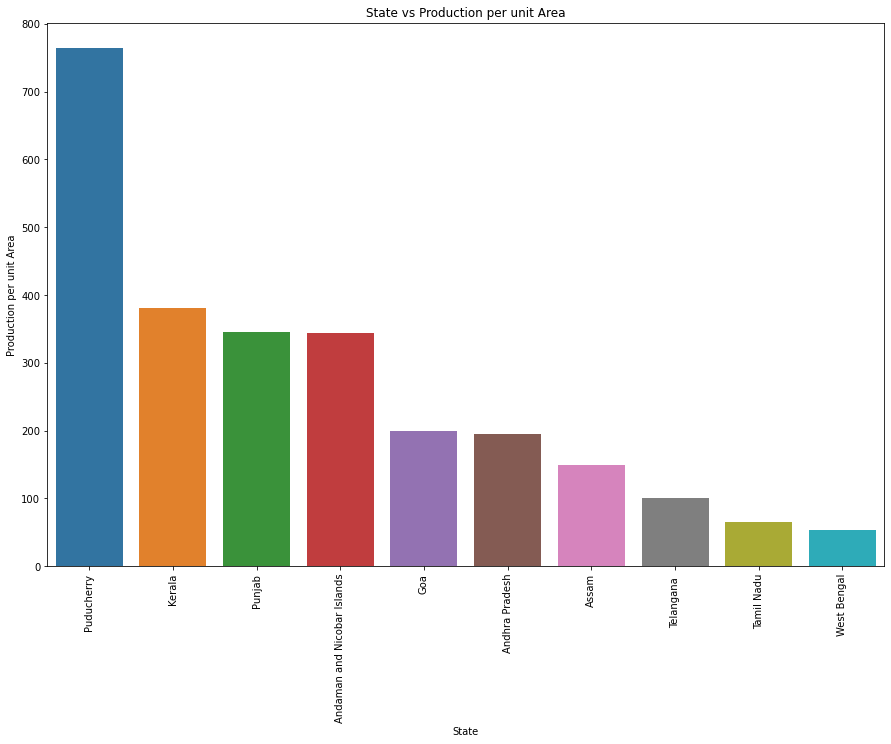

In [55]:
fig, ax = plt.subplots(figsize=(15,10))
a = sns.barplot(efficiency.State_Name.head(10), efficiency.prod_per_unit_area.head(10), errwidth=0)
plt.title('State vs Production per unit Area');
plt.xlabel("State")
plt.ylabel("Production per unit Area")
a.set_xticklabels(
    labels=efficiency.State_Name.head(10), rotation=90)
plt.show()

- Most efficieent states in terms of production per unit area are - Puducherry, Kerala and Punjab.

In [56]:
df["crop_category"].unique()

array(['Nuts', 'Pulses', 'Cereal', 'Fruits', None, 'spices', 'Commercial',
       'Vegetables', 'Oilseeds', 'fibres', 'Beans'], dtype=object)

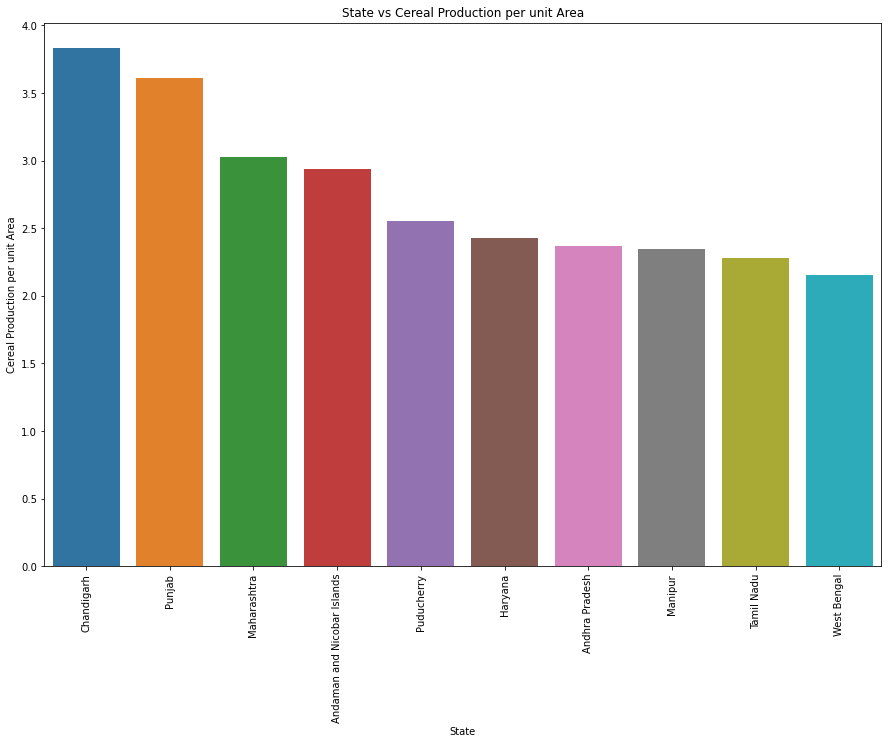

In [57]:
cereal_df = df[df["crop_category"]=="Cereal"]

efficiency_cereal = cereal_df.groupby('State_Name')['prod_per_unit_area'].mean().reset_index().sort_values(by='prod_per_unit_area', ascending=False)
efficiency_cereal.head(10)

fig, ax = plt.subplots(figsize=(15,10))
b = sns.barplot(efficiency_cereal.State_Name.head(10), efficiency_cereal.prod_per_unit_area.head(10), errwidth=0)
plt.title('State vs Cereal Production per unit Area');
plt.xlabel("State")
plt.ylabel("Cereal Production per unit Area")
b.set_xticklabels(
    labels=efficiency_cereal.State_Name.head(10), rotation=90)
plt.show()

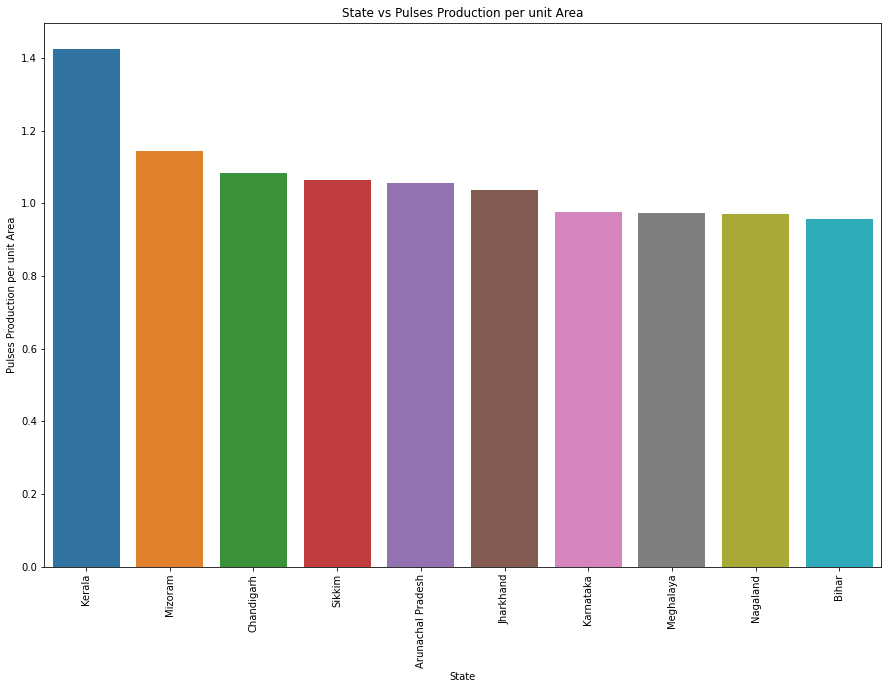

In [58]:
pulses_df = df[df["crop_category"]=="Pulses"]

efficiency_pulses = pulses_df.groupby('State_Name')['prod_per_unit_area'].mean().reset_index().sort_values(by='prod_per_unit_area', ascending=False)
efficiency_pulses.head(10)

fig, ax = plt.subplots(figsize=(15,10))
b = sns.barplot(efficiency_pulses.State_Name.head(10), efficiency_pulses.prod_per_unit_area.head(10), errwidth=0)
plt.title('State vs Pulses Production per unit Area');
plt.xlabel("State")
plt.ylabel("Pulses Production per unit Area")
b.set_xticklabels(
    labels=efficiency_pulses.State_Name.head(10), rotation=90)
plt.show()

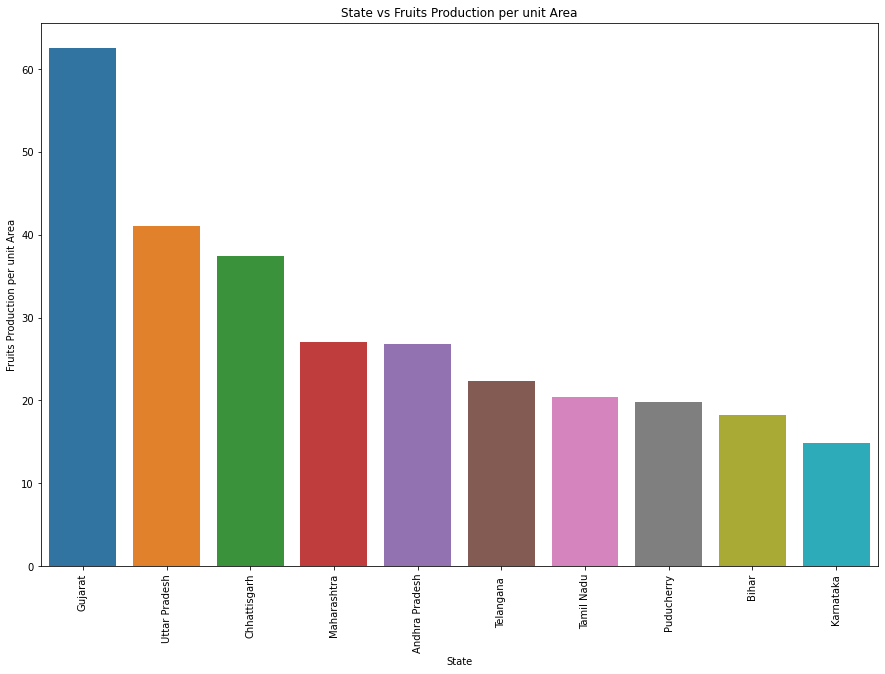

In [59]:
fruits_df = df[df["crop_category"]=="Fruits"]

efficiency_fruits = fruits_df.groupby('State_Name')['prod_per_unit_area'].mean().reset_index().sort_values(by='prod_per_unit_area', ascending=False)
efficiency_fruits.head(10)

fig, ax = plt.subplots(figsize=(15,10))
b = sns.barplot(efficiency_fruits.State_Name.head(10), efficiency_fruits.prod_per_unit_area.head(10), errwidth=0)
plt.title('State vs Fruits Production per unit Area');
plt.xlabel("State")
plt.ylabel("Fruits Production per unit Area")
b.set_xticklabels(
    labels=efficiency_fruits.State_Name.head(10), rotation=90)
plt.show()

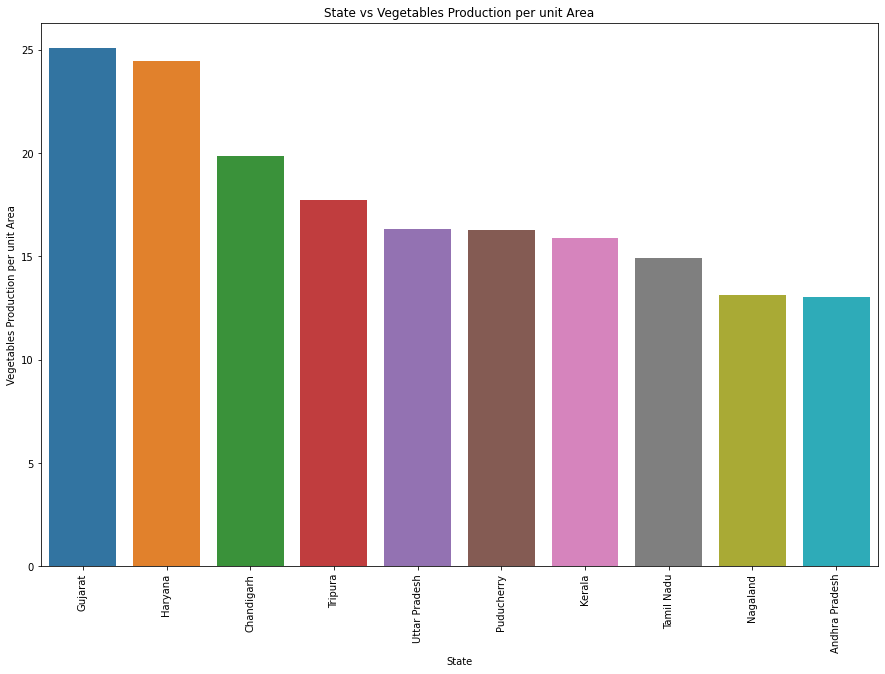

In [60]:
veg_df = df[df["crop_category"]=="Vegetables"]

efficiency_veg = veg_df.groupby('State_Name')['prod_per_unit_area'].mean().reset_index().sort_values(by='prod_per_unit_area', ascending=False)
efficiency_veg.head(10)

fig, ax = plt.subplots(figsize=(15,10))
b = sns.barplot(efficiency_veg.State_Name.head(10), efficiency_veg.prod_per_unit_area.head(10), errwidth=0)
plt.title('State vs Vegetables Production per unit Area');
plt.xlabel("State")
plt.ylabel("Vegetables Production per unit Area")
b.set_xticklabels(
    labels=efficiency_veg.State_Name.head(10), rotation=90)
plt.show()

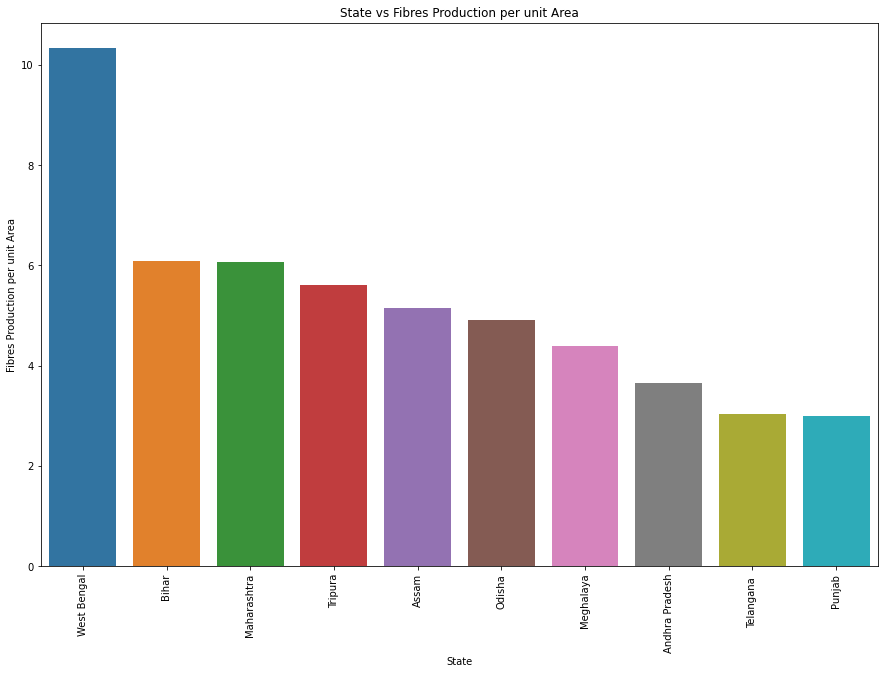

In [61]:
fibres_df = df[df["crop_category"]=="fibres"]

efficiency_fibres = fibres_df.groupby('State_Name')['prod_per_unit_area'].mean().reset_index().sort_values(by='prod_per_unit_area', ascending=False)
efficiency_fibres.head(10)

fig, ax = plt.subplots(figsize=(15,10))
b = sns.barplot(efficiency_fibres.State_Name.head(10), efficiency_fibres.prod_per_unit_area.head(10), errwidth=0)
plt.title('State vs Fibres Production per unit Area');
plt.xlabel("State")
plt.ylabel("Fibres Production per unit Area")
b.set_xticklabels(
    labels=efficiency_fibres.State_Name.head(10), rotation=90)
plt.show()

Most efficieent states in terms of production per unit area for various categories of crops are-
- Cereals - Chandigarh
- Pulses - Kerala
- Fruits - Gujrat
- Vegetables - Gujrat
- Fibres - West Bengal

## Inferences and Conclusion
We started with 246091 samples with 7 columns. Production Variable had 3730 (about 1.52% of total sample size) missing values which was dropped and working dataset has 242361 sample size. Also checked for multicollinearity of variables using heatmap.

#### Univarate-Analysis
- State_Name - 33 Names including Union territories. Top states contributing to dataset are Uttar Pardesh, Madhya Pradesh and Karnataka.
- Crop_Year - Dataset represents data for 19 years from 1997 to 2015 and maximum data from 2003, 2002 & 2007.
- Season - We see six seasons with maximum data from Kharif, Rabi and Whole year.
- Crop - We data for 124 different crops with maximum data from Rice, Maize and Moong(Green Gram).
- Area: Huge margin area used for production from 1 to 8580100 unit area. Distribution is highly right skewed due to lot of outliers.
- Production value ranges from 0 to 1.25e+09 and Distribution is highly right skewed due to lot of outliers.

### New Variables created
- crop_category - 124 crops were divided into Cereal, Pulses, oilseeds, Vegetables, spices, Nuts, Commercial, fibers, Beans, Fruits. Dateset shows top categories are Cereal, Pulses and oilseeds.
- prod_per_unit_area - This variable was created as by dividing production with the area.

### Visualisation of Data
1. State wise Production
2. Crop wise Production
3. Year wise Production
4. Season wise Production
5. Crop Category wise Production
6. Different Proportion of crop Categories

### Questions and Answers
1. Which Crop is seen in high frequency and when and where is it grown in India?
    - Rice is seen to have more frequency.
    - Rice is grown majorly in Winter.
    - State wise Punjab dominates in rice production
    - District wise its BARDHAMAN(2.13%), MEDINIPUR WEST(1.8%) and WEST GODAVARI(1.73%) which contributes to total rice production.
    - Year wise 2004 is the year when production reached the peak production.
    
    
2.  Which states ranks high in area wise crop production in India? Substantiate with facts and Figures.
    - Top cultivating states based on the Cultivation area are: Uttar Pradesh, Madhya Pradesh, Maharashtra, Rajasthan and West Bengal.
    - Year wise trend of these states:
        - Uttar Pradesh - High Production was seen in 2005 and after that it’s been reducing gradually.
        - Madhya Pradesh - 1998 showed a high production and then there was gradual reduction but it picked up and 2012 also showed a peak in Production.
        - Maharashtra - Production went down drastically in 2006 and again the levels went up and hit a high peak after 2007.
        - Rajasthan - Production hit a all time low in the year 2002 and then picked up by 2010.
        - West Bengal - Production hit a peak around 2006 but it has hit a low after 2007 and never recovered back.

3. Find the most efficient state (in terms of most production per unit area). Also find the most efficient state for some of the crop categories.
    - Most efficieent states in terms of production per unit area are - Puducherry, Kerala and Punjab.
    - Most efficieent states in terms of production per unit area for various categories of crops are:
        - Cereals - Chandigarh
        - Pulses - Kerala
        - Fruits - Gujrat
        - Vegetables - Gujrat
        - Fibres - West Bengal
        
### References and Future Work

dataset - https://www.kaggle.com/abhinand05/crop-production-in-india

#### Future Work
- We can predict future production prediction using regression.
- Status of their cultivation over the years, if the production has gone down (bad case scenario), why?
- Kerala is low in area coverage compared to other southern states but still in production levels its high why?